In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
zip_path = '/content/drive/MyDrive/input10.zip'
!cp {zip_path} .
!unzip -q input10.zip
!rm input10.zip

In [3]:
zip_path = '/content/drive/MyDrive/output10.zip'
!cp {zip_path} .
!unzip -q output10.zip
!rm output10.zip

In [5]:
import os

input_dir = "/content/input10"
target_dir = "/content/output10"
img_size = (160, 256)
num_classes = 64
batch_size = 6

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".png")
    ]
)
target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Number of samples:", len(input_img_paths))

for input_path, target_path in zip(input_img_paths[:100], target_img_paths[:100]):
    print(input_path, "|", target_path)

Number of samples: 297
/content/input10/10_1.png | /content/output10/10_1d.png
/content/input10/10_2.png | /content/output10/10_2d.png
/content/input10/10_3.png | /content/output10/10_3d.png
/content/input10/11_1.png | /content/output10/11_1d.png
/content/input10/11_2.png | /content/output10/11_2d.png
/content/input10/11_3.png | /content/output10/11_3d.png
/content/input10/12_1.png | /content/output10/12_1d.png
/content/input10/12_2.png | /content/output10/12_2d.png
/content/input10/12_3.png | /content/output10/12_3d.png
/content/input10/13_1.png | /content/output10/13_1d.png
/content/input10/13_2.png | /content/output10/13_2d.png
/content/input10/13_3.png | /content/output10/13_3d.png
/content/input10/14_1.png | /content/output10/14_1d.png
/content/input10/14_2.png | /content/output10/14_2d.png
/content/input10/14_3.png | /content/output10/14_3d.png
/content/input10/15_1.png | /content/output10/15_1d.png
/content/input10/15_2.png | /content/output10/15_2d.png
/content/input10/15_3.png

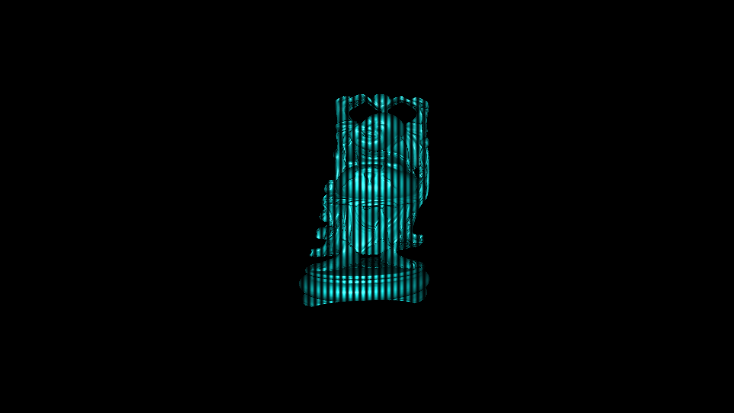

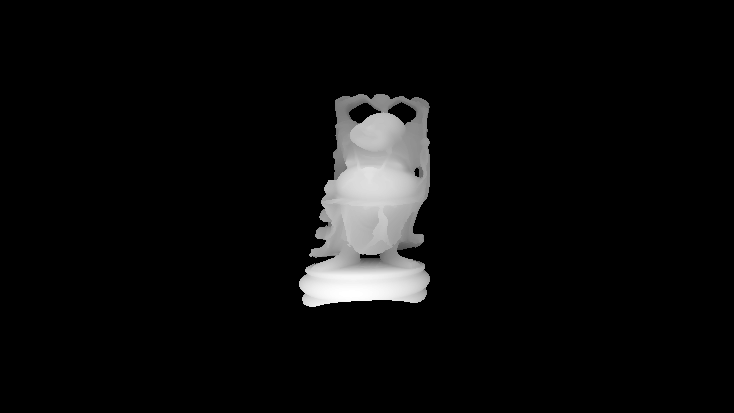

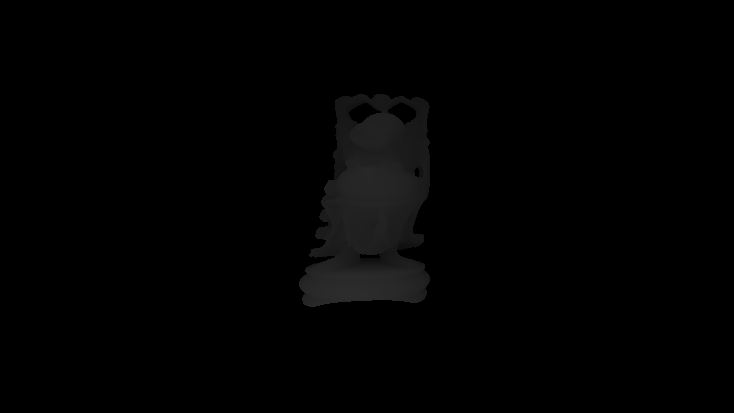

In [6]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps
import math
import numpy as np


# Display input image #7
display(Image(filename=input_img_paths[3]))

# Display auto-contrast version of corresponding target (per-pixel categories)
img = PIL.ImageOps.autocontrast(load_img(target_img_paths[3]))
display(img)

#img na x klas - test
img2 = load_img(target_img_paths[3])
img2 = PIL.ImageOps.grayscale(img2)
for i in range(img2.width):
  for j in range(img2.height):
    for c in range(num_classes):
      if ((img2.getpixel((i,j)) > (00+((c)*(255-0)/(num_classes)))) and (img2.getpixel((i,j)) <= (0+((c+1)*(255-0)/(num_classes))))):
        img2.putpixel( (i,j), (c+1) )
#img2 = img2*25
display(img2)

In [7]:
from tensorflow import keras
import numpy as np
from tensorflow.keras.preprocessing.image import load_img


class OxfordPets(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img_paths, target_img_paths):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img_paths = input_img_paths
        self.target_img_paths = target_img_paths

    def __len__(self):
        return len(self.target_img_paths) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""

        # cl to liczba poziomw szarosci planszy - klasy - 1 bo 0 to czarne tlo
        cl = num_classes - 1  
        i = idx * self.batch_size
        batch_input_img_paths = self.input_img_paths[i : i + self.batch_size]
        batch_target_img_paths = self.target_img_paths[i : i + self.batch_size]
        x = np.zeros((self.batch_size,) + self.img_size + (3,), dtype="uint8")
        for j, path in enumerate(batch_input_img_paths):
            img = load_img(path, target_size=self.img_size)
            x[j] = img
        y = np.zeros((self.batch_size,) + self.img_size + (1,), dtype="uint8")
        for j, path in enumerate(batch_target_img_paths):
            img = load_img(path, target_size=self.img_size, color_mode="grayscale")
            for aa in range(img.width):
                for bb in range(img.height):
                  for cc in range(cl):
                    if ((img.getpixel((aa,bb)) > 0+((cc)*(255-0)/(cl))) and (img.getpixel((aa,bb)) <= 20+((cc+1)*(255-0)/(cl)))):
                      img.putpixel( (aa,bb), (cc+1) )
                    #if (img.getpixel((aa,bb)) > 255):
                    #  img.putpixel( (aa,bb), cl)
            # for the given pixel at w,h, lets check its value against the threshold
                   # if img.getpixel((aa,bb)) == 51: #note that the first parameter is actually a tuple object
                # lets set this to zero
                    #    img.putpixel( (aa,bb), 1 )
                   # if img.getpixel((aa,bb)) == 41: #note that the first parameter is actually a tuple object
                # lets set this to zero
                    #    img.putpixel( (aa,bb), 1 )
                   # if img.getpixel((aa,bb)) == 61: #note that the first parameter is actually a tuple object
                # lets set this to zero
                    #    img.putpixel( (aa,bb), 2 )
                   # if img.getpixel((aa,bb)) == 71: #note that the first parameter is actually a tuple object
                # lets set this to zero
                    #    img.putpixel( (aa,bb), 2 )
            #return img, y[1].width
            #print(img.width)
            y[j] = np.expand_dims(img, 2)
            # Ground truth labels are 1, 2, 3. Subtract one to make them 0, 1, 2:
            
        return x, y
    #print(i)

In [8]:
from tensorflow.keras import layers


def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))

    ### [First half of the network: downsampling inputs] ###

    # Entry block
    x = layers.Conv2D(32, 3, strides=2, padding="same")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    # Blocks 1, 2, 3 are identical apart from the feature depth.
    for filters in [64, 128, 256, 512]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(1, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(filters, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    ### [Second half of the network: upsampling inputs] ###

    for filters in [512, 256, 128, 64, 32]:
        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.Conv2DTranspose(filters, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.UpSampling2D(2)(x)

        # Project residual
        residual = layers.UpSampling2D(2)(previous_block_activation)
        residual = layers.Conv2D(filters, 1, padding="same")(residual)
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    # Add a per-pixel classification layer
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Define the model
    model = keras.Model(inputs, outputs)
    return model


# Free up RAM in case the model definition cells were run multiple times
keras.backend.clear_session()

# Build model
model = get_model(img_size, num_classes)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 80, 128, 32)  896         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 80, 128, 32)  128        ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

In [9]:
import random

# Split our img paths into a training and a validation set
val_samples = 32
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_img_paths)
train_input_img_paths = input_img_paths[:-val_samples]
train_target_img_paths = target_img_paths[:-val_samples]
val_input_img_paths = input_img_paths[-val_samples:]
val_target_img_paths = target_img_paths[-val_samples:]

# Instantiate data Sequences for each split
train_gen = OxfordPets(
    batch_size, img_size, train_input_img_paths, train_target_img_paths
)
val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)

In [10]:
print(train_input_img_paths[17])
print(train_target_img_paths[17])

/content/input10/8_1.png
/content/output10/8_1d.png


In [ ]:
# Configure the model for training.
# We use the "sparse" version of categorical_crossentropy
# because our target data is integers.
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss="sparse_categorical_crossentropy", metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]

# Train the model, doing validation at the end of each epoch.
epochs = 30
model.fit(train_gen, epochs=epochs, validation_data=val_gen, callbacks=callbacks)

Epoch 1/30
44/44 [==============================] - ETA: 0s - loss: 2.0618 - accuracy: 0.8680 

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


44/44 [==============================] - 698s 16s/step - loss: 2.0618 - accuracy: 0.8680 - val_loss: 4.1995 - val_accuracy: 0.7153
Epoch 2/30
44/44 [==============================] - 685s 16s/step - loss: 0.2728 - accuracy: 0.9512 - val_loss: 0.6786 - val_accuracy: 0.9179
Epoch 3/30
44/44 [==============================] - 684s 16s/step - loss: 0.2118 - accuracy: 0.9489 - val_loss: 0.4638 - val_accuracy: 0.9625
Epoch 4/30
17/44 [==========>...................] - ETA: 6:13 - loss: 0.1905 - accuracy: 0.9477

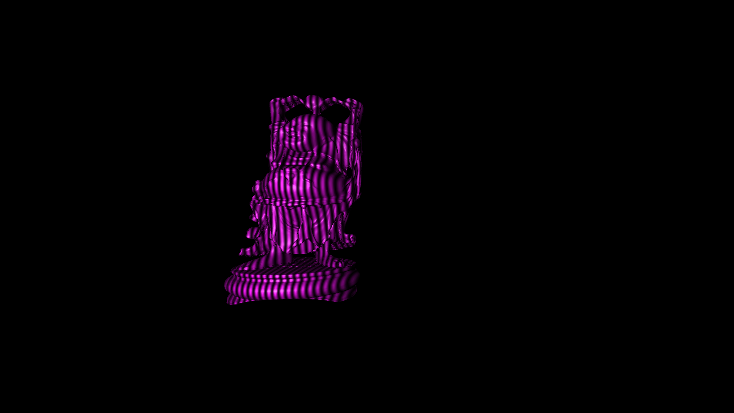

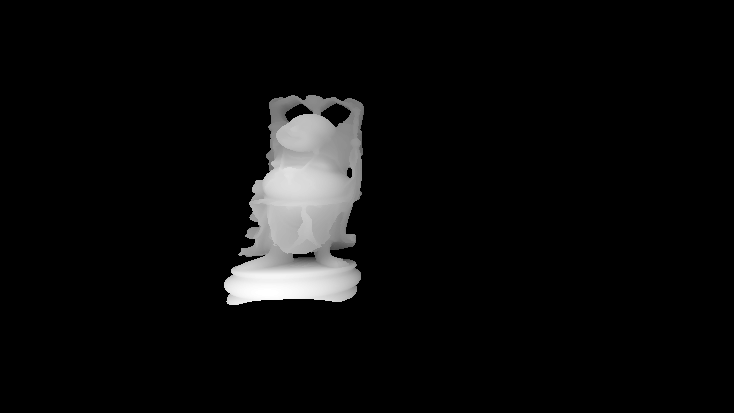

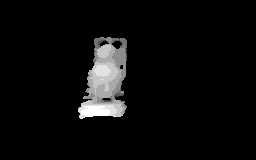

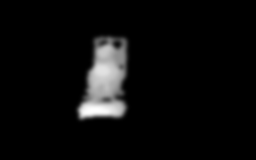

In [30]:
from PIL import ImageFilter

val_gen = OxfordPets(batch_size, img_size, val_input_img_paths, val_target_img_paths)
val_preds = model.predict(val_gen)


def display_mask(i):
    """Quick utility to display a model's prediction."""
    mask = np.argmax(val_preds[i], axis=-1)
    mask = np.expand_dims(mask, axis=-1)
    img = PIL.ImageOps.autocontrast(keras.preprocessing.image.array_to_img(mask))
    display(img)
    img2 = img.filter(ImageFilter.GaussianBlur(radius = 2))
    display(img2)


# Display results for validation image #10
i = 13

# Display input image
display(Image(filename=val_input_img_paths[i]))

# Display ground-truth target mask
img = PIL.ImageOps.autocontrast(load_img(val_target_img_paths[i]))
display(img)

# Display mask predicted by our model
display_mask(i)  # Note that the model only sees inputs at 150x150.

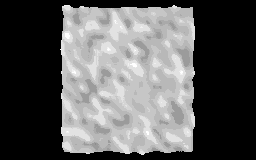

10


In [ ]:
import cv2

display_mask(i)

print(i)
